# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [87]:
import sklearn
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [88]:
print(penguins.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


we need to dummify the categorical variables - species, island and sex

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [122]:
penguins = penguins.dropna()
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

sort = penguins.sort_values(by = 'bill_length_mm')
sort_X = sort[['bill_length_mm']]
y_pred = lr_fit.predict(sort_X)
predictions = pd.DataFrame({'bill_length_mm': sort_X['bill_length_mm'], 'bill_depth_mm': y_pred})

<ipython-input-93-2c0736ce2cb1>:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


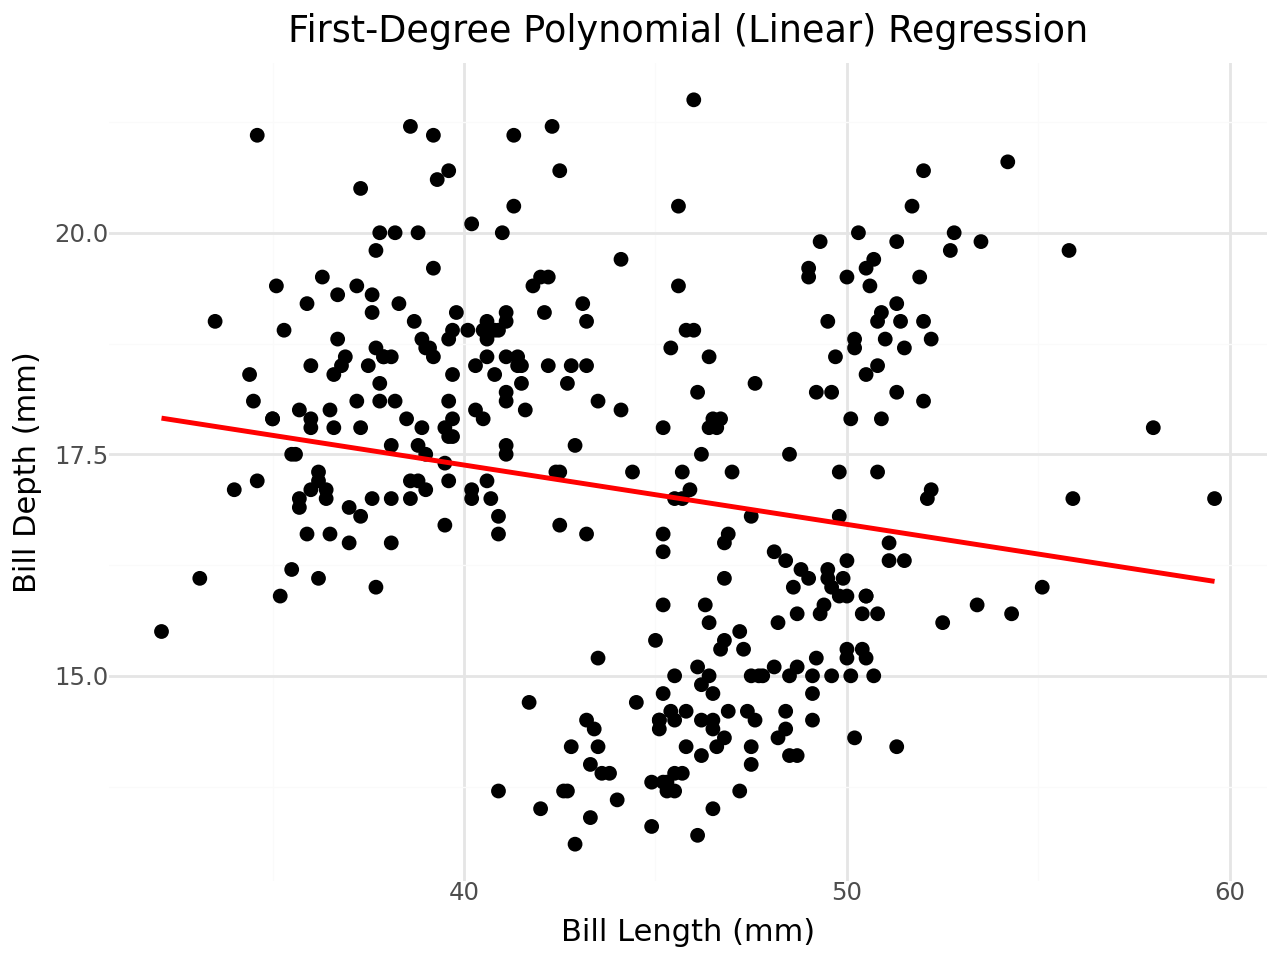

In [93]:
plot = (
    ggplot(data=penguins, mapping=aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color='black', size=2) + # original data
    geom_line(data=predictions, mapping=aes(x='bill_length_mm', y='bill_depth_mm'),
              color='red', size=1) + # prediction
    labs(x='Bill Length (mm)', y='Bill Depth (mm)',
         title='First-Degree Polynomial (Linear) Regression') +
    theme_minimal()
)

print(plot)

In [124]:
train_pred_1 = lr_fit.predict(X_train)
test_pred_1 = lr_fit.predict(X_test)

train_mse_1 = mean_squared_error(y_train, train_pred_1)
test_mse_1 = mean_squared_error(y_test, test_pred_1)

r2_train_1 = r2_score(y_train, train_pred_1)
r2_test_1 = r2_score(y_test, test_pred_1)

In [125]:
# Create quadratic feature for second-degree polynomial
penguins['length^2'] = penguins['bill_length_mm'] ** 2

# Define the target and features (first-degree and second-degree terms)
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm', 'length^2']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit the quadratic regression model
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

# Sort data by 'bill_length_mm' for smooth plotting
sort = penguins.sort_values(by='bill_length_mm')
sort_X = sort[['bill_length_mm', 'length^2']]
sort_X[['bill_length_mm', 'length^2']]

# Generate predictions for sorted X values
y_pred = lr_fit.predict(sort_X)

predictions = sort_X.copy()
predictions['bill_depth_mm'] = y_pred

<ipython-input-75-98f57b96ff32>:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


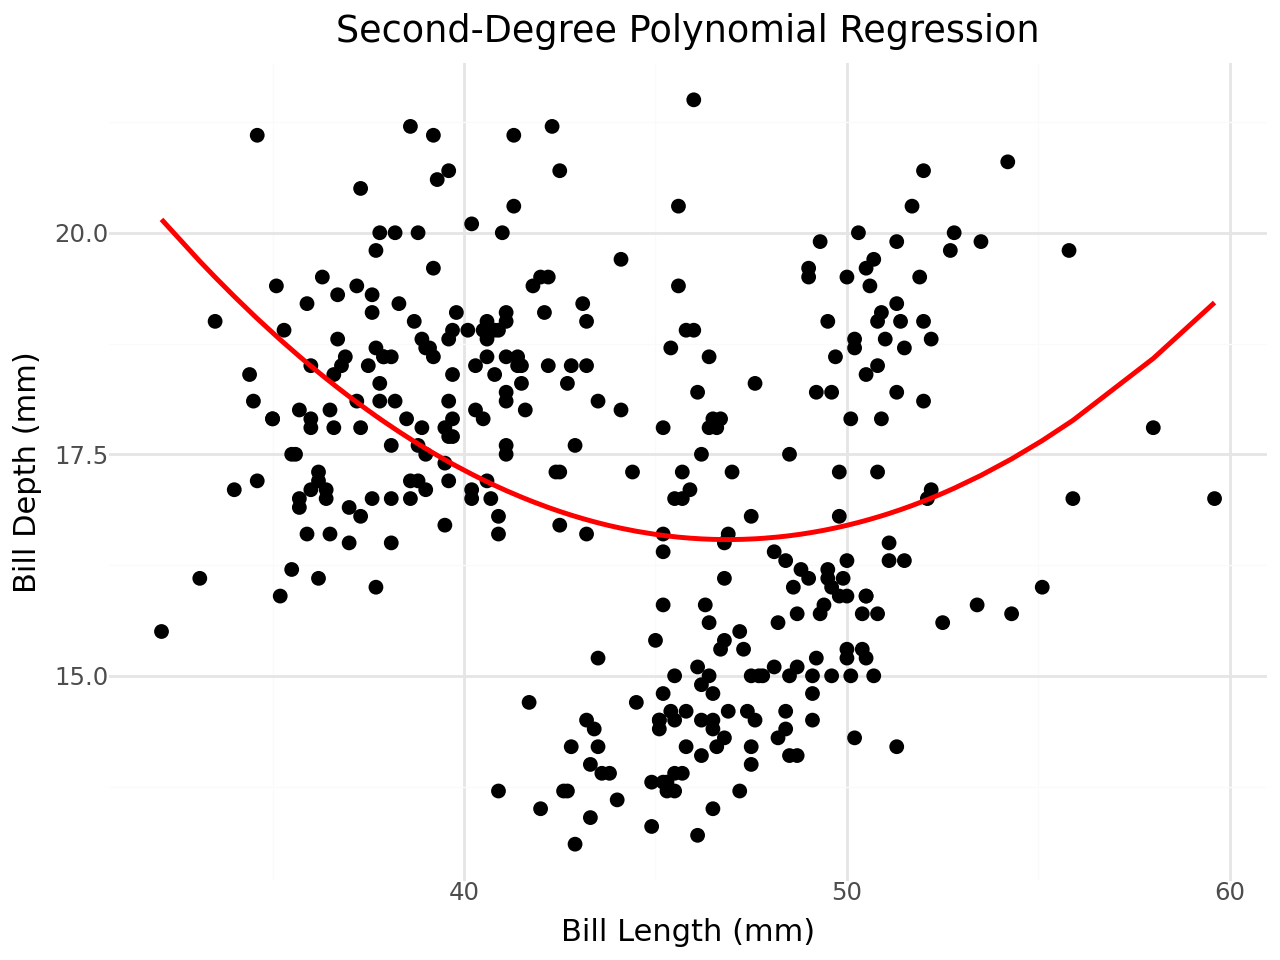

In [75]:
plot = (
    ggplot(data=penguins, mapping=aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color='black', size=2) +  # original data
    geom_line(data=predictions, mapping=aes(x='bill_length_mm', y='bill_depth_mm'),
              color='red', size=1) +    # regression line
    labs(x='Bill Length (mm)', y='Bill Depth (mm)', title='Second-Degree Polynomial Regression') +
    theme_minimal()
)

print(plot)

In [126]:
train_pred_2 = lr_fit.predict(X_train)
test_pred_2 = lr_fit.predict(X_test)

r2_train_2 = r2_score(y_train, train_pred_2)
r2_test_2 = r2_score(y_test, test_pred_2)

train_mse_2 = mean_squared_error(y_train, train_pred_2)
test_mse_2 = mean_squared_error(y_test, test_pred_2)

In [127]:
# Create quadratic feature for second-degree polynomial
penguins['length^2'] = penguins['bill_length_mm'] ** 2
penguins['length^3'] = penguins['bill_length_mm'] ** 3

# Define the target and features (first-degree and second-degree terms)
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm', 'length^2', 'length^3']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit the quadratic regression model
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

# Sort data by 'bill_length_mm' for smooth plotting
sort = penguins.sort_values(by='bill_length_mm')
sort_X = sort[['bill_length_mm', 'length^2', 'length^3']]
sort_X[['bill_length_mm', 'length^2', 'length^3']]

# Generate predictions for sorted X values
y_pred = lr_fit.predict(sort_X)

predictions = sort_X.copy()
predictions['bill_depth_mm'] = y_pred
#predictions

<ipython-input-78-669a45f8433e>:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


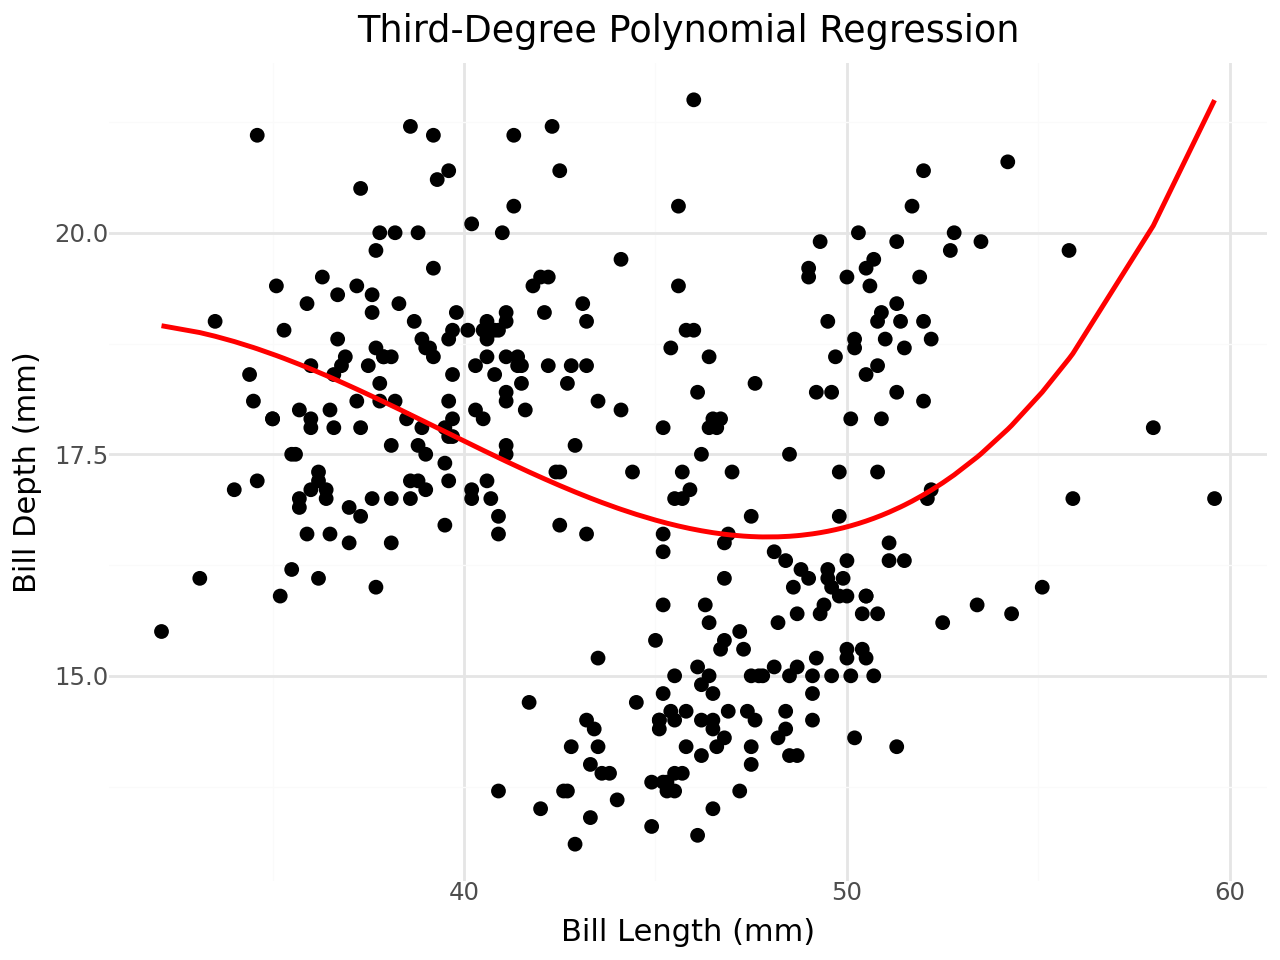

In [78]:
plot = (
    ggplot(data=penguins, mapping=aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color='black', size=2) +  # original data
    geom_line(data=predictions, mapping=aes(x='bill_length_mm', y='bill_depth_mm'),
              color='red', size=1) +    # regression line
    labs(x='Bill Length (mm)', y='Bill Depth (mm)', title='Third-Degree Polynomial Regression') +
    theme_minimal()
)

print(plot)

In [128]:
train_pred_3 = lr_fit.predict(X_train)
test_pred_3 = lr_fit.predict(X_test)

r2_train_3 = r2_score(y_train, train_pred_3)
r2_test_3 = r2_score(y_test, test_pred_3)

train_mse_3 = mean_squared_error(y_train, train_pred_3)
test_mse_3 = mean_squared_error(y_test, test_pred_3)

In [129]:
penguins['length^2'] = penguins['bill_length_mm'] ** 2
penguins['length^3'] = penguins['bill_length_mm'] ** 3
penguins['length^4'] = penguins['bill_length_mm'] ** 4
penguins['length^5'] = penguins['bill_length_mm'] ** 5
penguins['length^6'] = penguins['bill_length_mm'] ** 6
penguins['length^7'] = penguins['bill_length_mm'] ** 7
penguins['length^8'] = penguins['bill_length_mm'] ** 8
penguins['length^9'] = penguins['bill_length_mm'] ** 9
penguins['length^10'] = penguins['bill_length_mm'] ** 10

# Define the target and features (first-degree and second-degree terms)
y = penguins['bill_depth_mm']
X = penguins[['bill_length_mm', 'length^2', 'length^3', 'length^4', 'length^5', 'length^6', 'length^7', 'length^8', 'length^9', 'length^10']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Fit the quadratic regression model
lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

# Sort data by 'bill_length_mm' for smooth plotting
sort = penguins.sort_values(by='bill_length_mm')
sort_X = sort[['bill_length_mm', 'length^2', 'length^3', 'length^4', 'length^5', 'length^6', 'length^7', 'length^8', 'length^9', 'length^10']]
sort_X[['bill_length_mm', 'length^2', 'length^3', 'length^4', 'length^5', 'length^6', 'length^7', 'length^8', 'length^9', 'length^10']]

# Generate predictions for sorted X values
y_pred = lr_fit.predict(sort_X)

predictions = sort_X.copy()
predictions['bill_depth_mm'] = y_pred
#predictions

<ipython-input-85-52b535ed60c3>:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


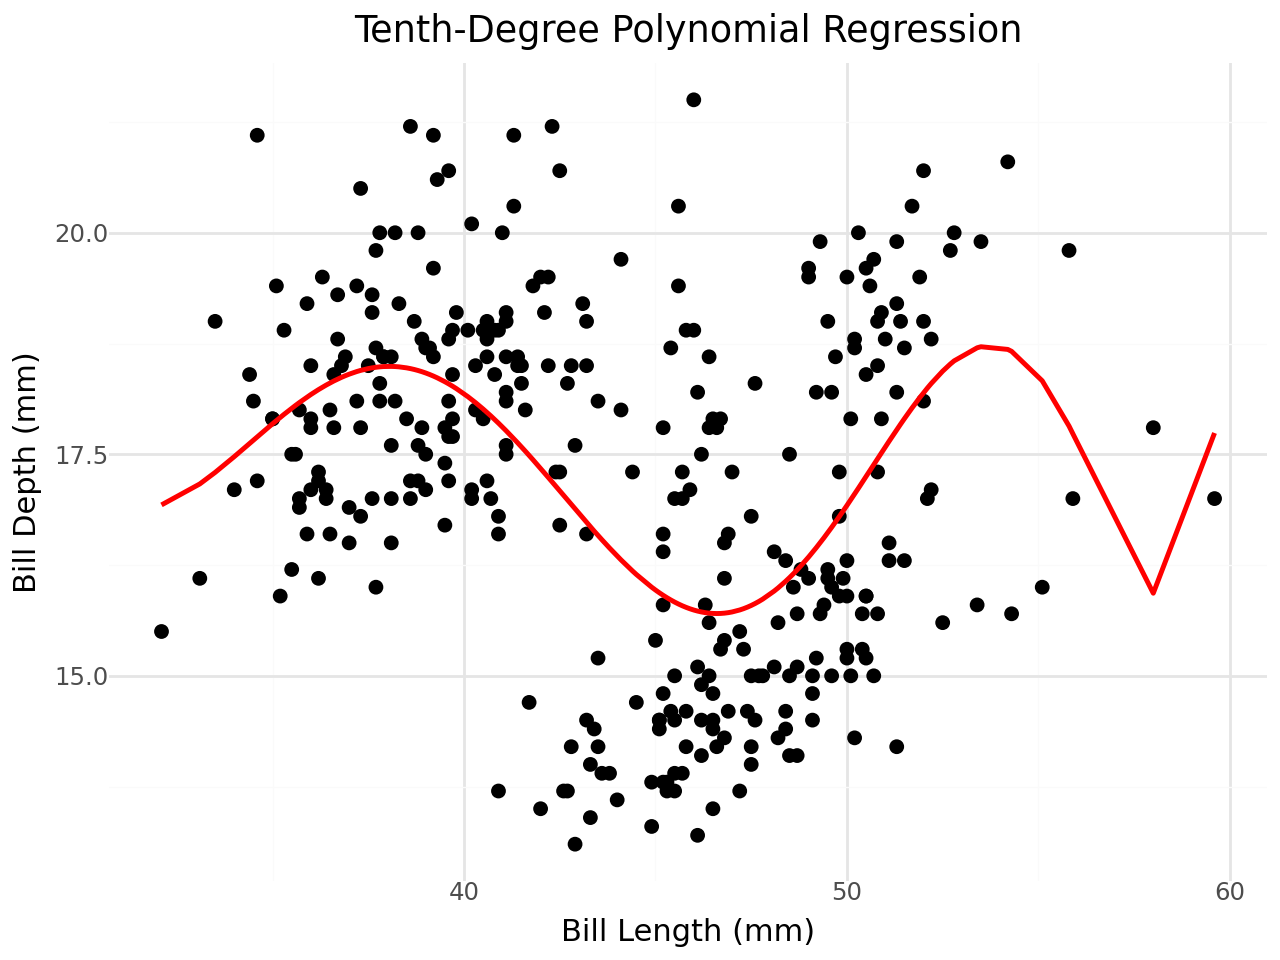

In [85]:
plot = (
    ggplot(data=penguins, mapping=aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color='black', size=2) +  # original data
    geom_line(data=predictions, mapping=aes(x='bill_length_mm', y='bill_depth_mm'),
              color='red', size=1) +    # regression line
    labs(x='Bill Length (mm)', y='Bill Depth (mm)', title='Tenth-Degree Polynomial Regression') +
    theme_minimal()
)

print(plot)

In [130]:
train_pred_10 = lr_fit.predict(X_train)
test_pred_10 = lr_fit.predict(X_test)

r2_train_10 = r2_score(y_train, train_pred_10)
r2_test_10 = r2_score(y_test, test_pred_10)

train_mse_10 = mean_squared_error(y_train, train_pred_10)
test_mse_10 = mean_squared_error(y_test, test_pred_10)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

In [131]:
data = {
    'Degree': [1, 2, 3, 10],
    'R² Train': [r2_train_1, r2_train_2, r2_train_3, r2_train_10],
    'R² Test': [r2_test_1, r2_test_2, r2_test_3, r2_test_10],
    'MSE Train': [train_mse_1, train_mse_2, train_mse_3, train_mse_10],
    'MSE Test': [test_mse_1, test_mse_2, test_mse_3, test_mse_10]
}

df = pd.DataFrame(data)
print(df)

   Degree  R² Train   R² Test  MSE Train  MSE Test
0       1  0.036000  0.092551   3.754351  3.424430
1       2  0.115715  0.084069   3.288821  3.906223
2       3  0.142652  0.100871   3.335326  3.374602
3      10  0.277593  0.297280   2.886786  2.436727


simple linear model is underfitting because it has a low R^2 on traing data and a relatively high MSE on test data while degree 10 moedel is overfitting because it has a high R^2 on traing data and low MSE on test data

In this case, cubic model fit the data best because it has the higher R^2 and lower MSE on testing data not considering the underfit and overfit model discussed above
